In [3]:
import sys
print(sys.executable)


/Library/Developer/CommandLineTools/usr/bin/python3


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import zscore
import numpy as np
import seaborn as sns

from matplotlib.patches import Patch


# Read data

## Indicators

In [4]:
# Dateien einlesen
part1 = pd.read_excel("../data/un_comtrade/trade_data.xlsx", sheet_name="Sheet1")

# Zusammenführen
year_df_combined = part1
year_df_combined

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20240101,2024,52,2024,32,ARG,Argentina,M,...,0.0,True,0,False,1.432718e+08,1.411101e+08,1.432718e+08,4,False,True
1,C,A,20240101,2024,52,2024,32,ARG,Argentina,X,...,0.0,False,0,False,NaN,7.995670e+05,7.995670e+05,0,False,True
2,C,A,20240101,2024,52,2024,36,AUS,Australia,M,...,NaN,False,0,False,3.258593e+09,3.209489e+09,3.258593e+09,0,False,True
3,C,A,20240101,2024,52,2024,36,AUS,Australia,X,...,NaN,False,0,False,NaN,1.731477e+09,1.731477e+09,0,False,True
4,C,A,20240101,2024,52,2024,51,ARM,Armenia,M,...,0.0,False,0,False,4.075292e+07,NaN,4.075292e+07,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,C,A,20240101,2024,52,2024,842,USA,USA,X,...,0.0,True,0,False,NaN,1.342371e+11,1.342371e+11,4,False,True
116,C,A,20240101,2024,52,2024,854,BFA,Burkina Faso,M,...,0.0,False,0,False,1.273939e+07,NaN,1.273939e+07,0,False,True
117,C,A,20240101,2024,52,2024,854,BFA,Burkina Faso,X,...,0.0,True,0,False,NaN,6.724450e+06,6.724450e+06,4,False,True
118,C,A,20240101,2024,52,2024,860,UZB,Uzbekistan,M,...,NaN,False,0,False,1.033000e+09,NaN,1.033000e+09,0,False,True


In [5]:
year_df_combined.columns

Index(['typeCode', 'freqCode', 'refPeriodId', 'refYear', 'refMonth', 'period',
       'reporterCode', 'reporterISO', 'reporterDesc', 'flowCode', 'flowDesc',
       'partnerCode', 'partnerISO', 'partnerDesc', 'partner2Code',
       'partner2ISO', 'partner2Desc', 'classificationCode',
       'classificationSearchCode', 'isOriginalClassification', 'cmdCode',
       'cmdDesc', 'aggrLevel', 'isLeaf', 'customsCode', 'customsDesc',
       'mosCode', 'motCode', 'motDesc', 'qtyUnitCode', 'qtyUnitAbbr', 'qty',
       'isQtyEstimated', 'altQtyUnitCode', 'altQtyUnitAbbr', 'altQty',
       'isAltQtyEstimated', 'netWgt', 'isNetWgtEstimated', 'grossWgt',
       'isGrossWgtEstimated', 'cifvalue', 'fobvalue', 'primaryValue',
       'legacyEstimationFlag', 'isReported', 'isAggregate'],
      dtype='object')

## Metadata

# Data Analysis

In [6]:
# Optional: bessere Formatierung in Jupyter
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [8]:
desired_columns = [
    'refYear',
    'reporterISO',
    'reporterDesc',
    'cifvalue',
    'fobvalue',
    'primaryValue',
    'flowDesc',
    'cmdCode',
]

# Nur die ersten 4 Spalten und die gewünschten behalten
df_filtered = year_df_combined[desired_columns]
df = df_filtered

## Initial Data Analysis (IDA)

### Checking Form & Struktur

In [9]:
df.shape

(120, 8)

### Checking Datentypen

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   refYear       120 non-null    int64  
 1   reporterISO   120 non-null    object 
 2   reporterDesc  120 non-null    object 
 3   cifvalue      58 non-null     float64
 4   fobvalue      75 non-null     float64
 5   primaryValue  120 non-null    float64
 6   flowDesc      120 non-null    object 
 7   cmdCode       120 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 7.6+ KB


### Checking first & last rows

In [11]:
df.head()

,refYear,reporterISO,reporterDesc,cifvalue,fobvalue,primaryValue,flowDesc,cmdCode
0,2024,ARG,Argentina,1.432718e+08,1.411101e+08,1.432718e+08,Import,88
1,2024,ARG,Argentina,NaN,7.995670e+05,7.995670e+05,Export,88
2,2024,AUS,Australia,3.258593e+09,3.209489e+09,3.258593e+09,Import,88
3,2024,AUS,Australia,NaN,1.731477e+09,1.731477e+09,Export,88
4,2024,ARM,Armenia,4.075292e+07,NaN,4.075292e+07,Import,88


In [12]:
df.tail()

,refYear,reporterISO,reporterDesc,cifvalue,fobvalue,primaryValue,flowDesc,cmdCode
115,2024,USA,USA,NaN,1.342371e+11,1.342371e+11,Export,88
116,2024,BFA,Burkina Faso,1.273939e+07,NaN,1.273939e+07,Import,88
117,2024,BFA,Burkina Faso,NaN,6.724450e+06,6.724450e+06,Export,88
118,2024,UZB,Uzbekistan,1.033000e+09,NaN,1.033000e+09,Import,88
119,2024,UZB,Uzbekistan,NaN,1.309106e+08,1.309106e+08,Export,88


### Checking Missing Values

In [13]:
# Übersicht zu fehlenden Werten
df.isnull().sum().sort_values(ascending=False)

cifvalue        62
fobvalue        45
refYear          0
reporterISO      0
reporterDesc     0
primaryValue     0
flowDesc         0
cmdCode          0
dtype: int64

### Checking unique values

In [14]:
# Anzahl eindeutiger Werte pro Spalte
df.nunique().sort_values()

refYear           1
cmdCode           1
flowDesc          2
cifvalue         58
reporterISO      60
reporterDesc     60
fobvalue         75
primaryValue    120
dtype: int64

### Basic statistics

In [15]:
# Grundstatistik
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
refYear,120.0,NaN,NaN,NaN,2024.0,0.0,2024.0,2024.0,2024.0,2024.0,2024.0
reporterISO,120,60,ARG,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reporterDesc,120,60,Argentina,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cifvalue,58.0,NaN,NaN,NaN,2404020439.387328,5787147048.807199,1316085.93,31530249.715,250685961.308,2509627630.86975,35911934667.0
fobvalue,75.0,NaN,NaN,NaN,4137012016.07416,16460786767.380543,351544.765,24591920.828,189714707.534,1984505064.9705,134237060573.0
primaryValue,120.0,NaN,NaN,NaN,3321674855.979291,13268519790.777142,351544.765,25575056.56675,183589793.3555,2060433587.13575,134237060573.0
flowDesc,120,2,Import,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cmdCode,120.0,NaN,NaN,NaN,88.0,0.0,88.0,88.0,88.0,88.0,88.0


## Delete Import 

In [20]:
df = df[df['flowDesc'] != 'Import']
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
refYear,60.0,NaN,NaN,NaN,2024.0,0.0,2024.0,2024.0,2024.0,2024.0,2024.0
reporterISO,60,60,ARG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reporterDesc,60,60,Argentina,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cifvalue,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fobvalue,60.0,NaN,NaN,NaN,4158911042.412733,17904748737.626591,351544.765,18491163.70475,125963345.268,1782248775.53325,134237060573.0
primaryValue,60.0,NaN,NaN,NaN,4158911042.412733,17904748737.626591,351544.765,18491163.70475,125963345.268,1782248775.53325,134237060573.0
flowDesc,60,1,Export,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cmdCode,60.0,NaN,NaN,NaN,88.0,0.0,88.0,88.0,88.0,88.0,88.0


### Detect outlieres

Z-Score

In [23]:
col = "primaryValue"
name = "reporterISO"

missing_countries = df[df[col].isna()][name].unique()

# Fehlende Länder ausgeben
print(col + " für folgende Länder nicht verfügbar:")

if(missing_countries.size != 0):
    for country in missing_countries:
        print("-", country)
else: 
    print("Keine Länder mit fehlenden Werten gefunden.")

# NaN-Werte entfernen
df_complete = df.dropna(subset=[col])

# Z-Score berechnen
df_complete['Z_Score'] = zscore(df_complete[col])

# Ausreißer mit |Z| > 1.5
outliers = np.abs(df_complete['Z_Score']) > 1.5
df_outliers = df_complete.loc[outliers, [name, col, 'Z_Score']]

# Ergebnis anzeigen
df_outliers


primaryValue für folgende Länder nicht verfügbar:
Keine Länder mit fehlenden Werten gefunden.


,reporterISO,primaryValue,Z_Score
39,DEU,3.626790e+10,1.808456
115,USA,1.342371e+11,7.326318


Visually: histograms

In [24]:

# Kategorische Daten als "category" casten
categorical_columns = ['refYear','reporterISO','reporterDesc','flowDesc','cmdCode']
for col in categorical_columns:
    df[col] = df[col].astype('category')

Überspringe cifvalue: keine gültigen Werte.


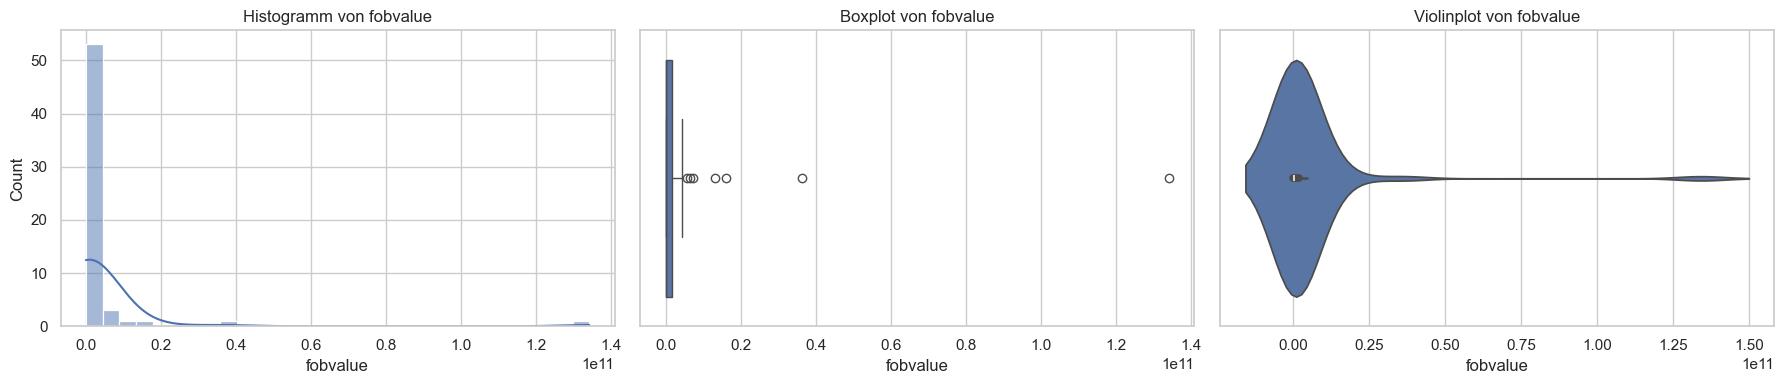

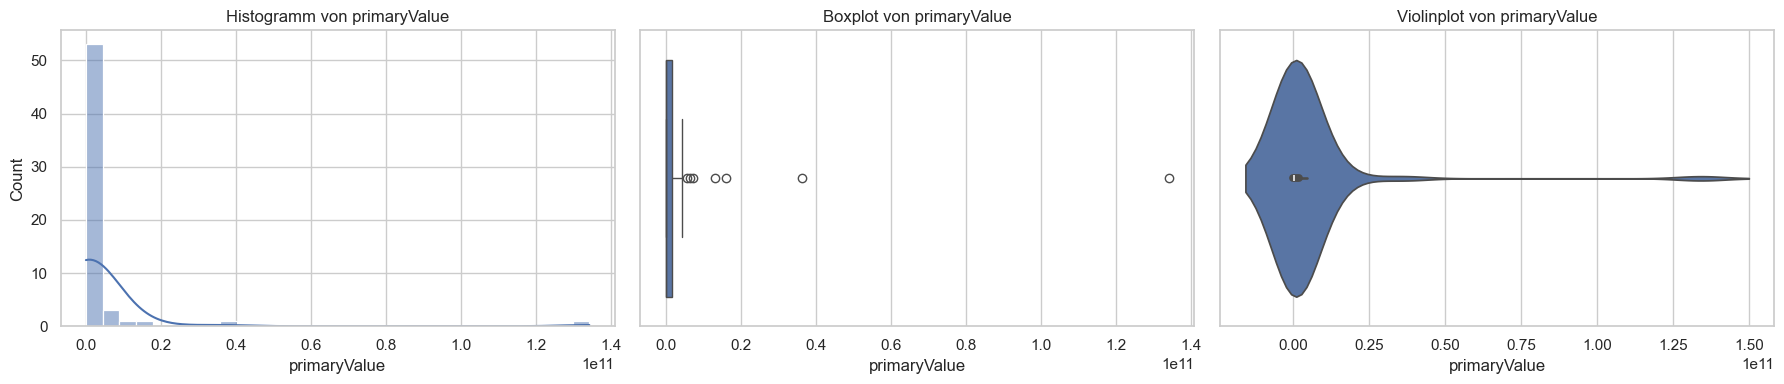

In [25]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    col_data = df[col].dropna()

    # Wenn Spalte nur NaNs enthält, überspringen
    if col_data.empty:
        print(f"Überspringe {col}: keine gültigen Werte.")
        continue

    fig, axes = plt.subplots(1, 3, figsize=(18, 4))

    # Histogramm
    sns.histplot(col_data, kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f'Histogramm von {col}')

    # Boxplot
    sns.boxplot(x=col_data, ax=axes[1])
    axes[1].set_title(f'Boxplot von {col}')

    # Violinplot
    sns.violinplot(x=col_data, ax=axes[2])
    axes[2].set_title(f'Violinplot von {col}')

    plt.tight_layout()
    plt.show()


## Exploratory Data Analysis (EDA)

### Correlation Matrix

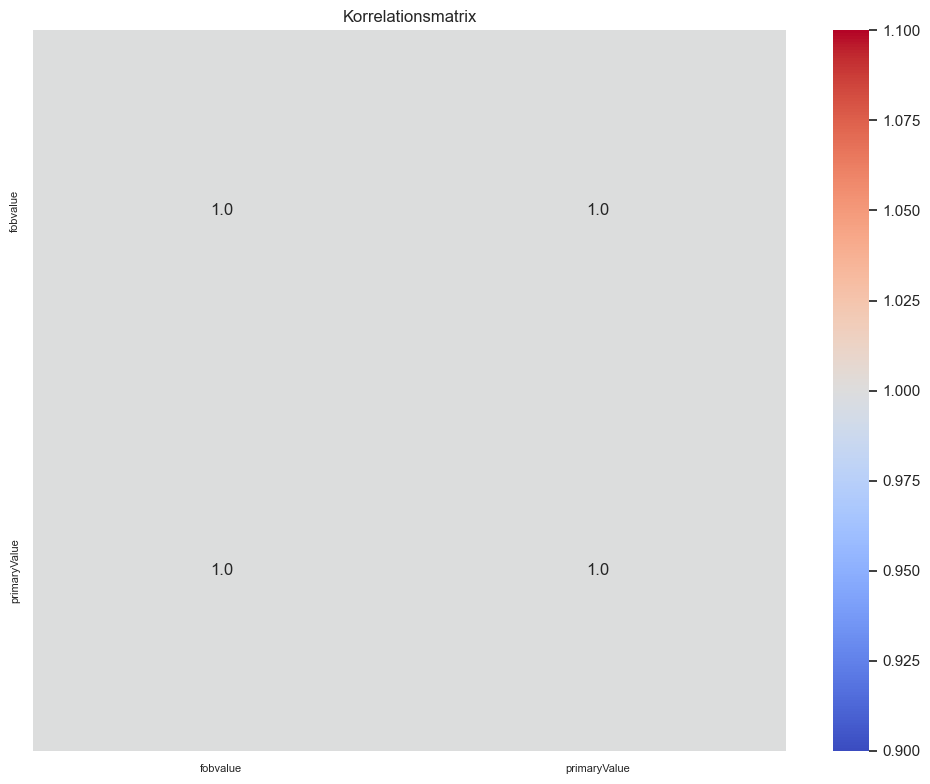

In [28]:

df_filtered = df.drop(columns=["cifvalue"])

# Numerische Spalten auswählen, aber 'index' und 'Year' ausschließen
exclude_cols = ['index', 'Year']
num_cols = [col for col in df_filtered.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_cols]

# Korrelationsmatrix plotten
plt.figure(figsize=(10, 8))
sns.heatmap(df_filtered[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Korrelationsmatrix')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.savefig('korrelationsmatrix.png', dpi=600)
plt.show()


### Pairplot

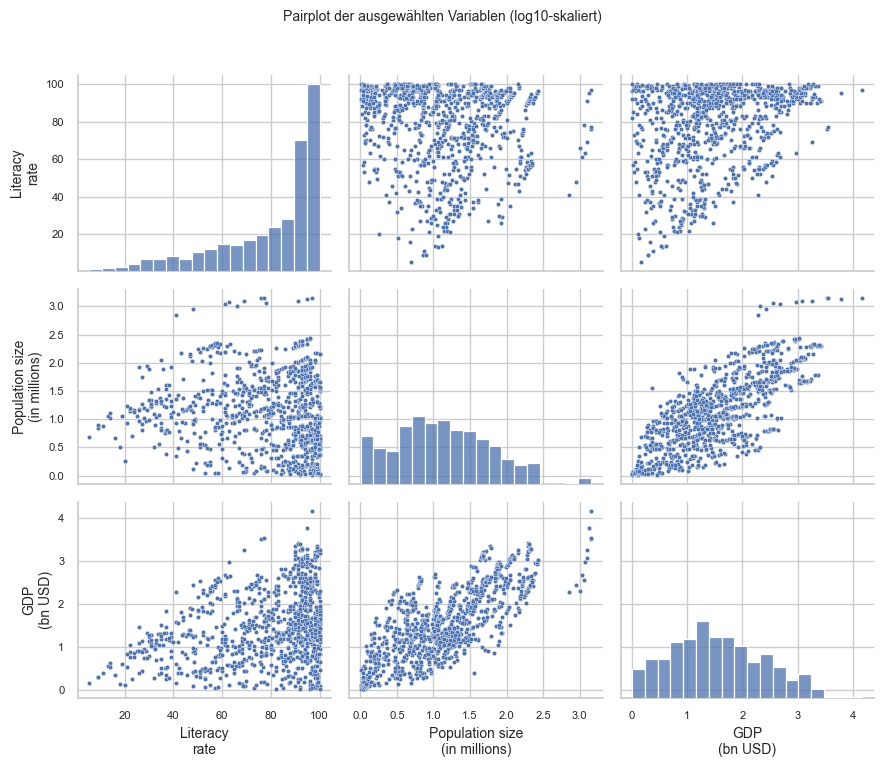

In [41]:
# Drei ausgewählte Variablen
selected_cols = [
    'Literacy rate',
    'Population size in millions',
    'Gross Domestic Product billions of U.S. dollars'
]

# Achsentitel in zwei Zeilen umformatieren
label_map = {
    'Literacy rate': 'Literacy\nrate',
    'Population size in millions': 'Population size\n(in millions)',
    'Gross Domestic Product billions of U.S. dollars': 'GDP\n(bn USD)'
}

# Log-Skalierung anwenden (außer 'Literacy rate')
df_log = df[selected_cols].dropna().copy()
df_log[selected_cols[1:]] = df_log[selected_cols[1:]].apply(lambda x: np.log10(x + 1))

# Pairplot mit kleineren Punkten
g = sns.pairplot(
    df_log,
    height=2.5,
    aspect=1.2,
    plot_kws={'s': 10}
)

# Achsenbeschriftungen anpassen (2-zeilig, größer)
for ax in g.axes.flatten():
    if ax is not None:
        xlabel = ax.get_xlabel()
        ylabel = ax.get_ylabel()
        if xlabel in label_map:
            ax.set_xlabel(label_map[xlabel], fontsize=10)
        if ylabel in label_map:
            ax.set_ylabel(label_map[ylabel], fontsize=10)
        ax.tick_params(axis='both', labelsize=8)

# Titel und Layout
plt.suptitle('Pairplot der ausgewählten Variablen (log10-skaliert)', y=1.02, fontsize=10)
plt.tight_layout()
plt.show()


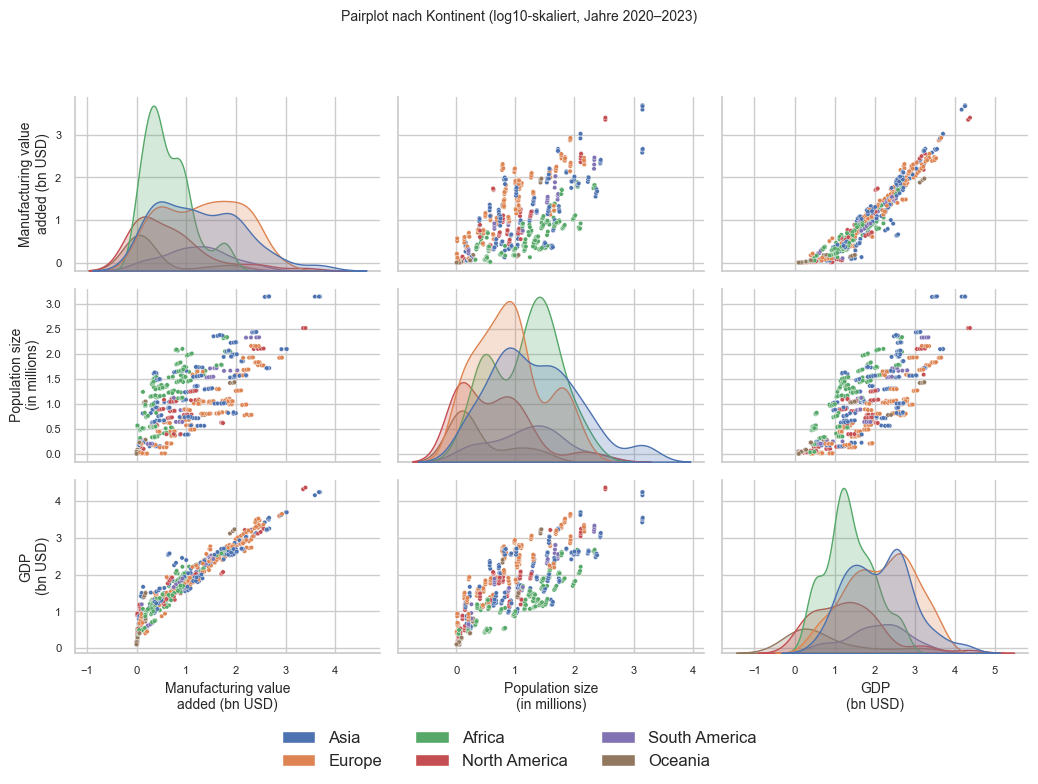

In [42]:
# Drei ausgewählte Variablen
selected_cols = [
    'Manufacturing value added billion USD',
    'Population size in millions',
    'Gross Domestic Product billions of U.S. dollars'
]

# Achsentitel in zwei Zeilen umformatieren
label_map = {
    'Manufacturing value added billion USD': 'Manufacturing value\nadded (bn USD)',
    'Population size in millions': 'Population size\n(in millions)',
    'Gross Domestic Product billions of U.S. dollars': 'GDP\n(bn USD)'
}

# Daten filtern: nur 2020–2023, keine NaN, 'Continent' einbeziehen
df_filtered = df[df['Year'].between(2020, 2023)].copy()
df_log = df_filtered[selected_cols + ['Continent']].dropna().copy()

# Log-Skalierung anwenden
df_log[selected_cols] = df_log[selected_cols].apply(lambda x: np.log10(x + 1))

# Pairplot mit hue=Continent
g = sns.pairplot(
    df_log,
    hue='Continent',
    height=2.5,
    aspect=1.2,
    plot_kws={'s': 10}
)

# Automatische Legende entfernen
if g._legend is not None:
    g._legend.remove()

# Farben aus Line2D-Objekten extrahieren
legend_elements = [
    Patch(facecolor=g._legend_data[label].get_color(), label=label)
    for label in g._legend_data
]

# Achsenbeschriftungen anpassen (2-zeilig, größer)
for ax in g.axes.flatten():
    if ax is not None:
        xlabel = ax.get_xlabel()
        ylabel = ax.get_ylabel()
        if xlabel in label_map:
            ax.set_xlabel(label_map[xlabel], fontsize=10)
        if ylabel in label_map:
            ax.set_ylabel(label_map[ylabel], fontsize=10)
        ax.tick_params(axis='both', labelsize=8)

# Neue, sichtbare Legende unten zentriert einfügen
g.fig.legend(
    handles=legend_elements,
    loc='lower center',
    ncol=3,
    fontsize=12,
    frameon=False
)

# Titel und Layout
plt.suptitle('Pairplot nach Kontinent (log10-skaliert, Jahre 2020–2023)', y=1.03, fontsize=10)
plt.tight_layout(rect=[0, 0.07, 1, 0.98])  # Platz für Legende schaffen
plt.show()


### Paretoplot

/var/folders/px/73cs5v9j0dzgd0f2x5g_6lcc0000gn/T/ipykernel_75146/2958058207.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_pop = df_pop.groupby('Country', as_index=False)['Population size in millions'].sum()


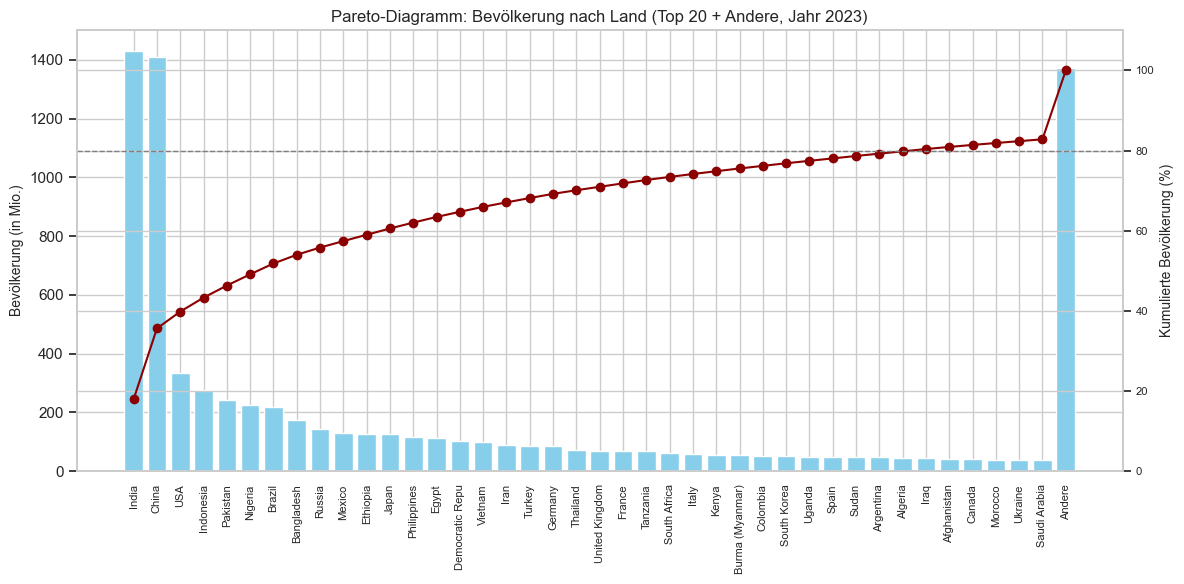

In [43]:
# --- 1. Daten vorbereiten ---

# Filter auf Jahr 2023 und relevante Spalten
df_2023 = df[df['Year'] == 2023].copy()
df_pop = df_2023[['Country', 'Population size in millions']].dropna()

# Gruppieren nach Land (falls mehrfach vorhanden) und summieren
df_pop = df_pop.groupby('Country', as_index=False)['Population size in millions'].sum()

# Sortieren nach Bevölkerungsgröße
df_pop_sorted = df_pop.sort_values(by='Population size in millions', ascending=False).reset_index(drop=True)

# --- 2. Top 20 + "Andere" zusammenfassen ---
top_n = 40
df_top = df_pop_sorted.head(top_n).copy()

# Restliche Länder aggregieren
rest = df_pop_sorted.tail(len(df_pop_sorted) - top_n)
other_sum = rest['Population size in millions'].sum()

# "Andere"-Zeile hinzufügen
df_top = pd.concat([
    df_top,
    pd.DataFrame([{'Country': 'Andere', 'Population size in millions': other_sum}])
], ignore_index=True)

# Kumulierte Prozentwerte berechnen
df_top['cum_percent'] = df_top['Population size in millions'].cumsum() / df_top['Population size in millions'].sum() * 100

# Optional: Ländernamen kürzen, falls zu lang
df_top['Country'] = df_top['Country'].str.slice(0, 15)

# --- 3. Plot erstellen ---

fig, ax1 = plt.subplots(figsize=(12, 6))

# Balken für absolute Bevölkerungsgröße
ax1.bar(df_top['Country'], df_top['Population size in millions'], color='skyblue')
ax1.set_ylabel('Bevölkerung (in Mio.)', fontsize=10)
ax1.tick_params(axis='x', rotation=90, labelsize=8)

# Zweite Y-Achse für kumulierte Prozentwerte
ax2 = ax1.twinx()
ax2.plot(df_top['Country'], df_top['cum_percent'], color='darkred', marker='o')
ax2.set_ylabel('Kumulierte Bevölkerung (%)', fontsize=10)
ax2.tick_params(axis='y', labelsize=8)
ax2.set_ylim(0, 110)

# Hilfslinie bei 80 %
ax2.axhline(80, color='gray', linestyle='dashed', linewidth=1)

# Titel und Layout
plt.title('Pareto-Diagramm: Bevölkerung nach Land (Top 20 + Andere, Jahr 2023)', fontsize=12)
plt.tight_layout()
plt.show()
